In [1]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import astroML.stats

In [26]:
#definisco una funzione che mi fa la chain
#0 stands for cloudy, 1 stands for sunny

def sampler(num_sample, inizio):
    
    attuale=inizio
    posterior=[attuale]
    
    for i in range(num_sample):
        if attuale==0:
            proposal=np.random.choice(np.array([0, 1]), p=np.array([0.5,0.5])) 
            posterior=np.append(posterior, proposal)
            
        if attuale==1:
            proposal=np.random.choice(np.array([0, 1]), p=np.array([0.1,0.9])) 
            posterior=np.append(posterior, proposal)
        attuale=proposal
    return posterior    

In [28]:
samples=sampler(10000, 0)

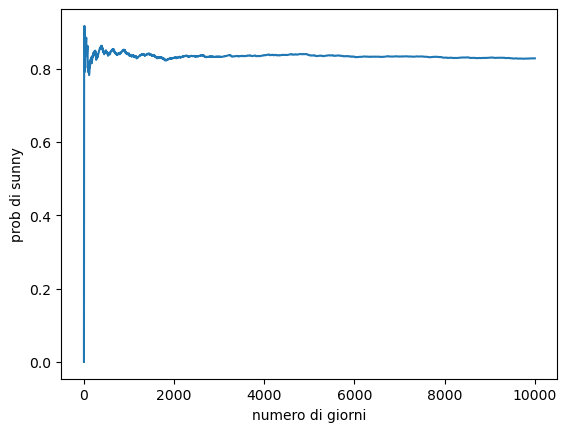

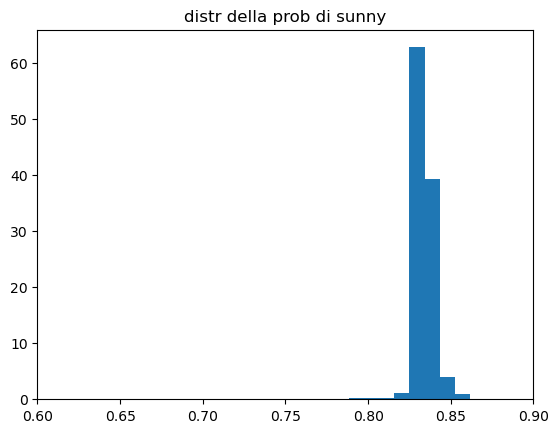

In [32]:
s=np.array(samples)
n_days=np.arange(1,10002)

plt.plot(n_days, np.cumsum(s)/n_days)
plt.xlabel("numero di giorni")
plt.ylabel("prob di sunny")
plt.show()

plt.hist(np.cumsum(s)/n_days, bins=100, density=True) 
plt.title("distr della prob di sunny")
plt.xlim(0.6,0.9)
plt.show()

In [33]:
sunny=np.cumsum(s)/n_days  
print("mediana della probabilità:", np.median(sunny))

print("errore: ", astroML.stats.sigmaG(sunny))

print("valore minimo della prob ", min(sunny),"valore massimo della prob ", max(sunny))

mediana della probabilità: 0.833308920462868
errore:  0.004096262597279511
valore minimo della prob  0.0 valore massimo della prob  0.9166666666666666


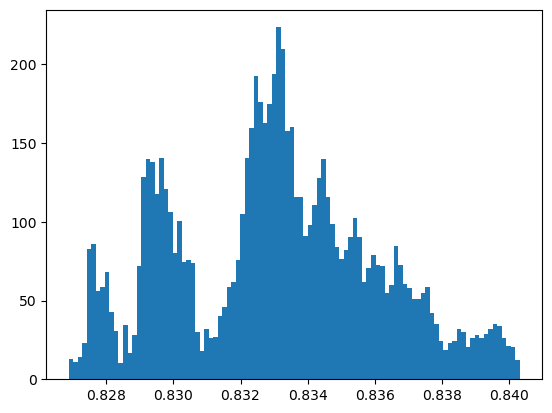

mediana:  0.8331090174966352
errore:  0.0033947237896032644


In [36]:
#burn in, guardo la traccia per decidere
plt.hist(sunny[2000:], bins=100, density=True)
plt.show()
print("mediana: ",np.median(sunny[2000:]))

print("errore: ", astroML.stats.sigmaG(sunny[2000:]))